# Load the log and analyze the data


In [49]:
# Install necessary library if not already installed
# !pip install pm4py
from pm4py.objects.log.importer.xes.importer import apply as xes_importer
import pandas as pd

# Load the XES files
conformant_file = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_log_hierarchical.xes'
non_conformant_file = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_log_hierarchical.xes'

# Import XES logs
conformant_log = xes_importer(conformant_file)
non_conformant_log = xes_importer(non_conformant_file)

# Helper function to convert log to DataFrame
def log_to_dataframe(log):
    data = []
    for trace in log:
        for event in trace:
            event_data = {key: value for key, value in event.items()}
            event_data['case:concept:name'] = trace.attributes['concept:name']
            data.append(event_data)
    return pd.DataFrame(data)

# Convert logs to DataFrames
conformant_df = log_to_dataframe(conformant_log)
non_conformant_df = log_to_dataframe(non_conformant_log)

# Save logs as CSV for reference
conformant_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_log_hierarchical.csv'
non_conformant_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_log_hierarchical.csv'

conformant_df.to_csv(conformant_csv_path, index=False)
non_conformant_df.to_csv(non_conformant_csv_path, index=False)

# Keywords for program analysis
program_keywords = [
    'Data science og datamangament, ing.bach.',
    'Industriel økonomi og teknologiledelse, cand.polyt.',
    'Byggeri og infrastruktur, ing.prof.bach.'
]

# Define the column name for programs
activity_column_name = "Program"

# Function to extract relevant programs
def extract_programs(df, keywords, activity_column):
    return df[df[activity_column].str.contains('|'.join(keywords), case=False, na=False)]

# Extract programs from conformant and non-conformant logs
conformant_programs = extract_programs(conformant_df, program_keywords, activity_column_name)
non_conformant_programs = extract_programs(non_conformant_df, program_keywords, activity_column_name)

# Save extracted programs to CSV for inspection
conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_programs.csv'
non_conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_programs.csv'

conformant_programs.to_csv(conformant_programs_csv, index=False)
non_conformant_programs.to_csv(non_conformant_programs_csv, index=False)

# Compare programs (group by 'Program' and count occurrences)
conformant_analysis = conformant_programs.groupby(activity_column_name).size()
non_conformant_analysis = non_conformant_programs.groupby(activity_column_name).size()

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Conformant': conformant_analysis,
    'Non-Conformant': non_conformant_analysis
}).fillna(0).astype(int)

# Save comparison results to CSV
comparison_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\program_comparison.csv'
comparison_df.to_csv(comparison_csv_path)

# Display output paths for inspection
print(f"Conformant Log CSV saved at: {conformant_csv_path}")
print(f"Non-Conformant Log CSV saved at: {non_conformant_csv_path}")
print(f"Conformant Programs CSV saved at: {conformant_programs_csv}")
print(f"Non-Conformant Programs CSV saved at: {non_conformant_programs_csv}")
print(f"Program Comparison CSV saved at: {comparison_csv_path}")


parsing log, completed traces :: 100%|██████████| 5920/5920 [00:04<00:00, 1286.20it/s]


Conformant Log CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\conformant_log_hierarchical.csv
Non-Conformant Log CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\non_conformant_log_hierarchical.csv
Conformant Programs CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\conformant_programs.csv
Non-Conformant Programs CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\non_conformant_programs.csv
Program Comparison CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\program_comparison.csv


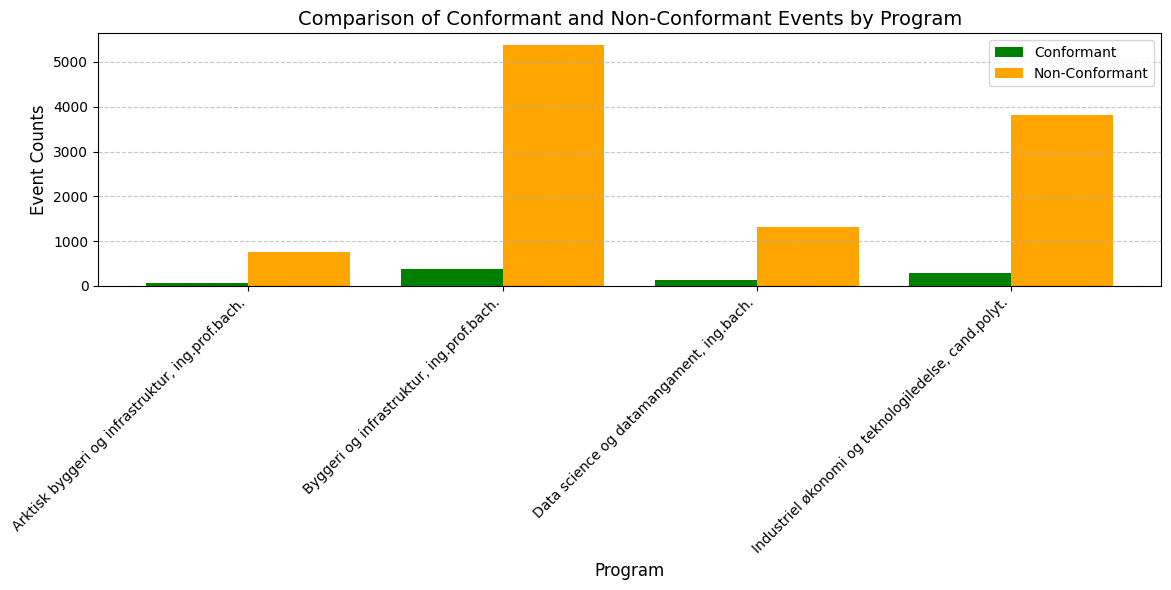

original data:
      Program  Conformant  Non-Conformant
0     Arktisk          63             766
1     Byggeri         380            5370
2        Data         136            1310
3  Industriel         291            3817


In [50]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
comparison_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\program_comparison.csv'
comparison_df = pd.read_csv(comparison_csv_path)



# Visualize the Conformant and Non-Conformant numbers with full program names
plt.figure(figsize=(12, 6))
x = range(len(comparison_df["Program"]))

# Bar width for Conformant and Non-Conformant counts
bar_width = 0.4

# Create bars for Conformant and Non-Conformant
plt.bar(x, comparison_df["Conformant"], width=bar_width, label='Conformant', color='green', align='center')
plt.bar([p + bar_width for p in x], comparison_df["Non-Conformant"], width=bar_width, label='Non-Conformant', color='orange', align='center')

# Add labels, title, and legend
plt.xlabel("Program", fontsize=12)
plt.ylabel("Event Counts", fontsize=12)
plt.title("Comparison of Conformant and Non-Conformant Events by Program", fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], comparison_df["Program"], rotation=45, ha="right", fontsize=10)
plt.legend()

# Add grid for better visualization
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# show the data
print("original data:")
# make an abbr for the program name
comparison_df['Program'] = comparison_df['Program'].str.extract(r'([A-Za-z]+)')
print(comparison_df)




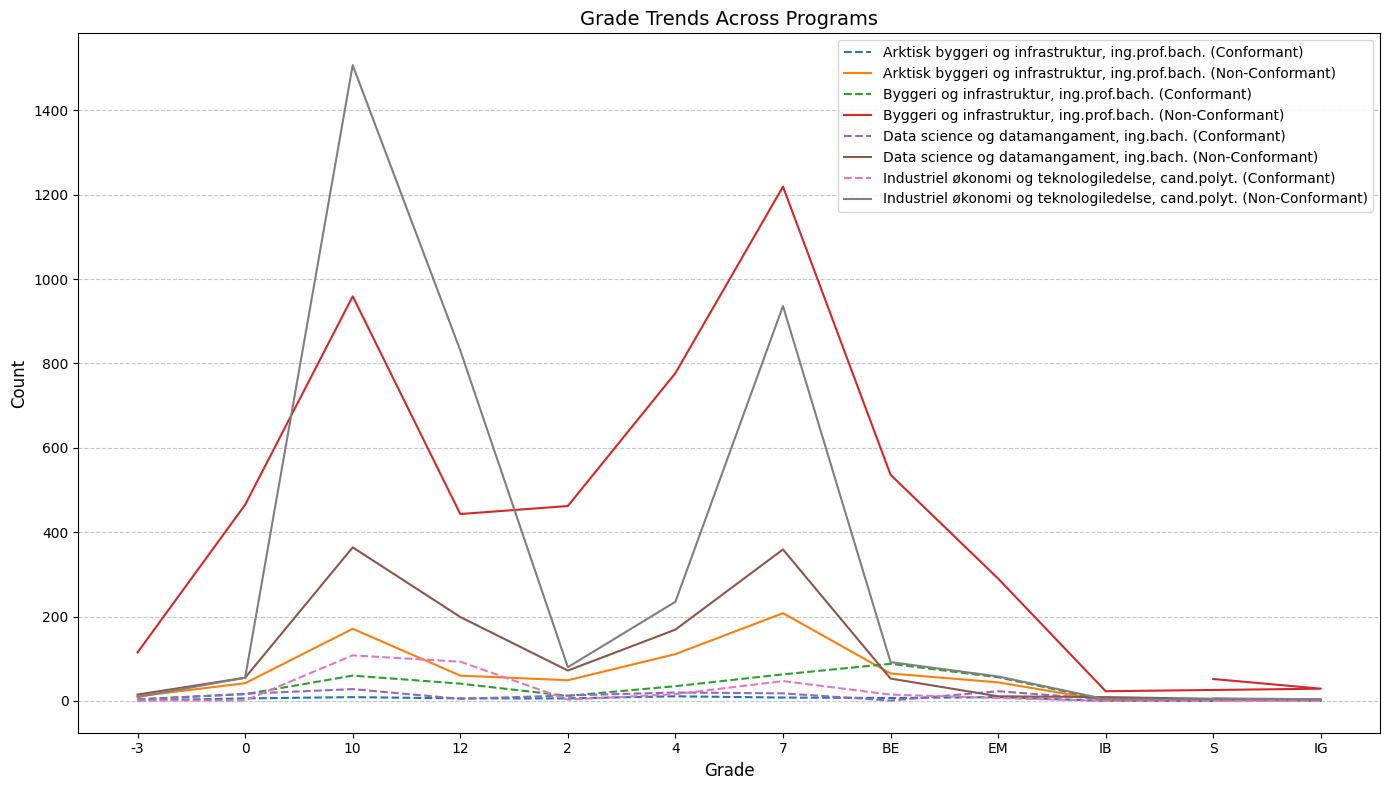

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the program data CSV files
conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_programs.csv'
non_conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_programs.csv'

# Load the data
conformant_programs = pd.read_csv(conformant_programs_csv)
non_conformant_programs = pd.read_csv(non_conformant_programs_csv)

# Combine conformant and non-conformant data
conformant_programs['Type'] = 'Conformant'
non_conformant_programs['Type'] = 'Non-Conformant'
combined_programs = pd.concat([conformant_programs, non_conformant_programs], ignore_index=True)

# Group by Program and Grade, then count occurrences
grade_trends = combined_programs.groupby(['Program', 'Grade', 'Type']).size().reset_index(name='Count')

# Pivot data for visualization
pivot_trends = grade_trends.pivot_table(index=['Program', 'Grade'], columns='Type', values='Count', fill_value=0)

# Reset index for easy plotting
pivot_trends.reset_index(inplace=True)

# Plot Grade Trends by Program
plt.figure(figsize=(14, 8))
for program in pivot_trends['Program'].unique():
    program_data = pivot_trends[pivot_trends['Program'] == program]
    plt.plot(program_data['Grade'], program_data['Conformant'], label=f'{program} (Conformant)', linestyle='--')
    plt.plot(program_data['Grade'], program_data['Non-Conformant'], label=f'{program} (Non-Conformant)')

# Add labels, legend, and title
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Grade Trends Across Programs', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



Average Grade Comparison Across Programs:
                                             Program  \
0   Arktisk byggeri og infrastruktur, ing.prof.bach.   
1           Byggeri og infrastruktur, ing.prof.bach.   
2           Data science og datamangament, ing.bach.   
3  Industriel økonomi og teknologiledelse, cand.p...   

   Conformant Average Grade  Non-Conformant Average Grade  
0                  5.765957                      6.740798  
1                  7.294372                      6.109459  
2                  5.413462                      7.555556  
3                  9.635688                      8.942513  


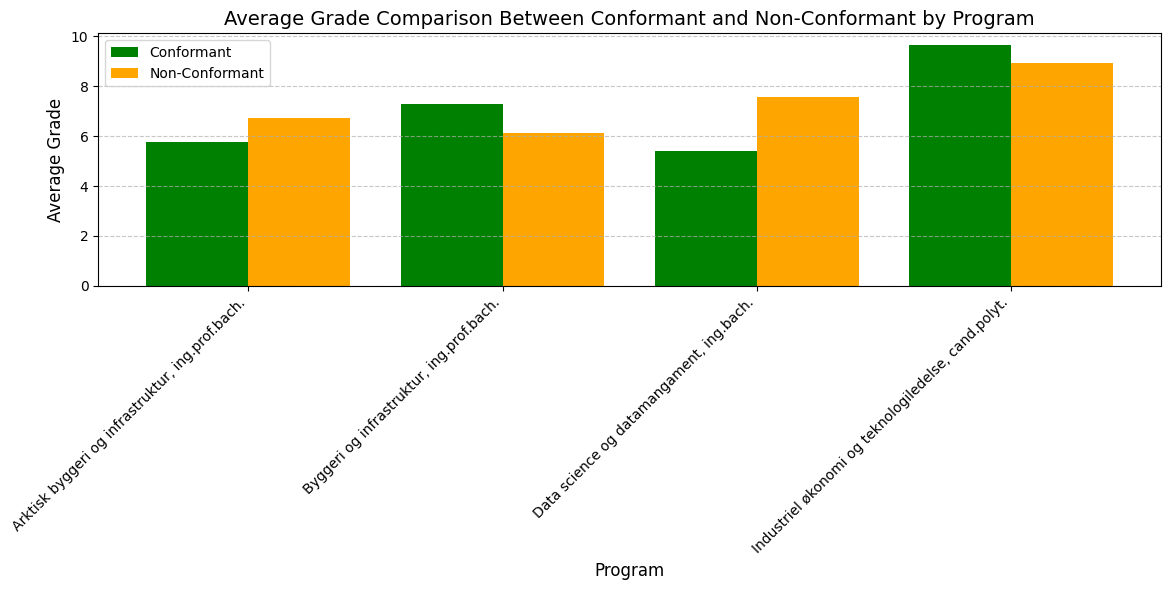

In [52]:
# Calculate average grades separately for conformant and non-conformant data
if 'Grade' in conformant_programs.columns and 'Grade' in non_conformant_programs.columns:
    # Convert 'Grade' to numeric if not already
    conformant_programs['Grade'] = pd.to_numeric(conformant_programs['Grade'], errors='coerce')
    non_conformant_programs['Grade'] = pd.to_numeric(non_conformant_programs['Grade'], errors='coerce')
    
    # Calculate average grade per program for conformant
    conformant_avg_grade = conformant_programs.groupby('Program')['Grade'].mean().reset_index()
    conformant_avg_grade.columns = ['Program', 'Conformant Average Grade']
    
    # Calculate average grade per program for non-conformant
    non_conformant_avg_grade = non_conformant_programs.groupby('Program')['Grade'].mean().reset_index()
    non_conformant_avg_grade.columns = ['Program', 'Non-Conformant Average Grade']
    
    # Merge results for comparison
    avg_grade_comparison = pd.merge(conformant_avg_grade, non_conformant_avg_grade, on='Program', how='outer')
    
    # Print the average grades
    print("\nAverage Grade Comparison Across Programs:")
    print(avg_grade_comparison)
    
    # Plot the average grades
    plt.figure(figsize=(12, 6))
    bar_width = 0.4
    x = range(len(avg_grade_comparison["Program"]))
    
    # Conformant bars
    plt.bar(x, avg_grade_comparison["Conformant Average Grade"], width=bar_width, label='Conformant', color='green', align='center')
    
    # Non-Conformant bars
    plt.bar([p + bar_width for p in x], avg_grade_comparison["Non-Conformant Average Grade"], width=bar_width, label='Non-Conformant', color='orange', align='center')
    
    # Add labels, title, and legend
    plt.xlabel("Program", fontsize=12)
    plt.ylabel("Average Grade", fontsize=12)
    plt.title("Average Grade Comparison Between Conformant and Non-Conformant by Program", fontsize=14)
    plt.xticks([p + bar_width / 2 for p in x], avg_grade_comparison["Program"], rotation=45, ha="right", fontsize=10)
    plt.legend()
    
    # Add grid for better visualization
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The dataset does not contain a 'Grade' column for analysis.")


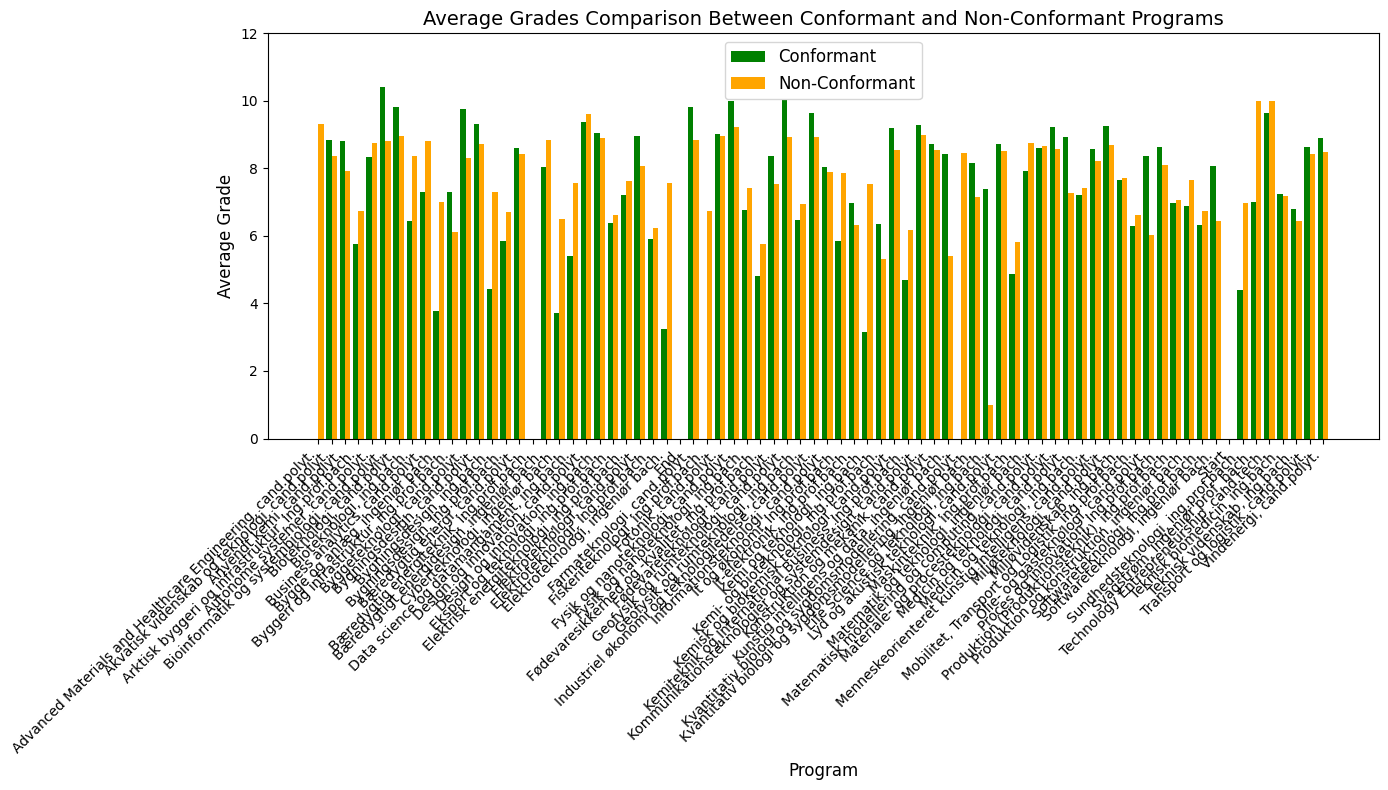

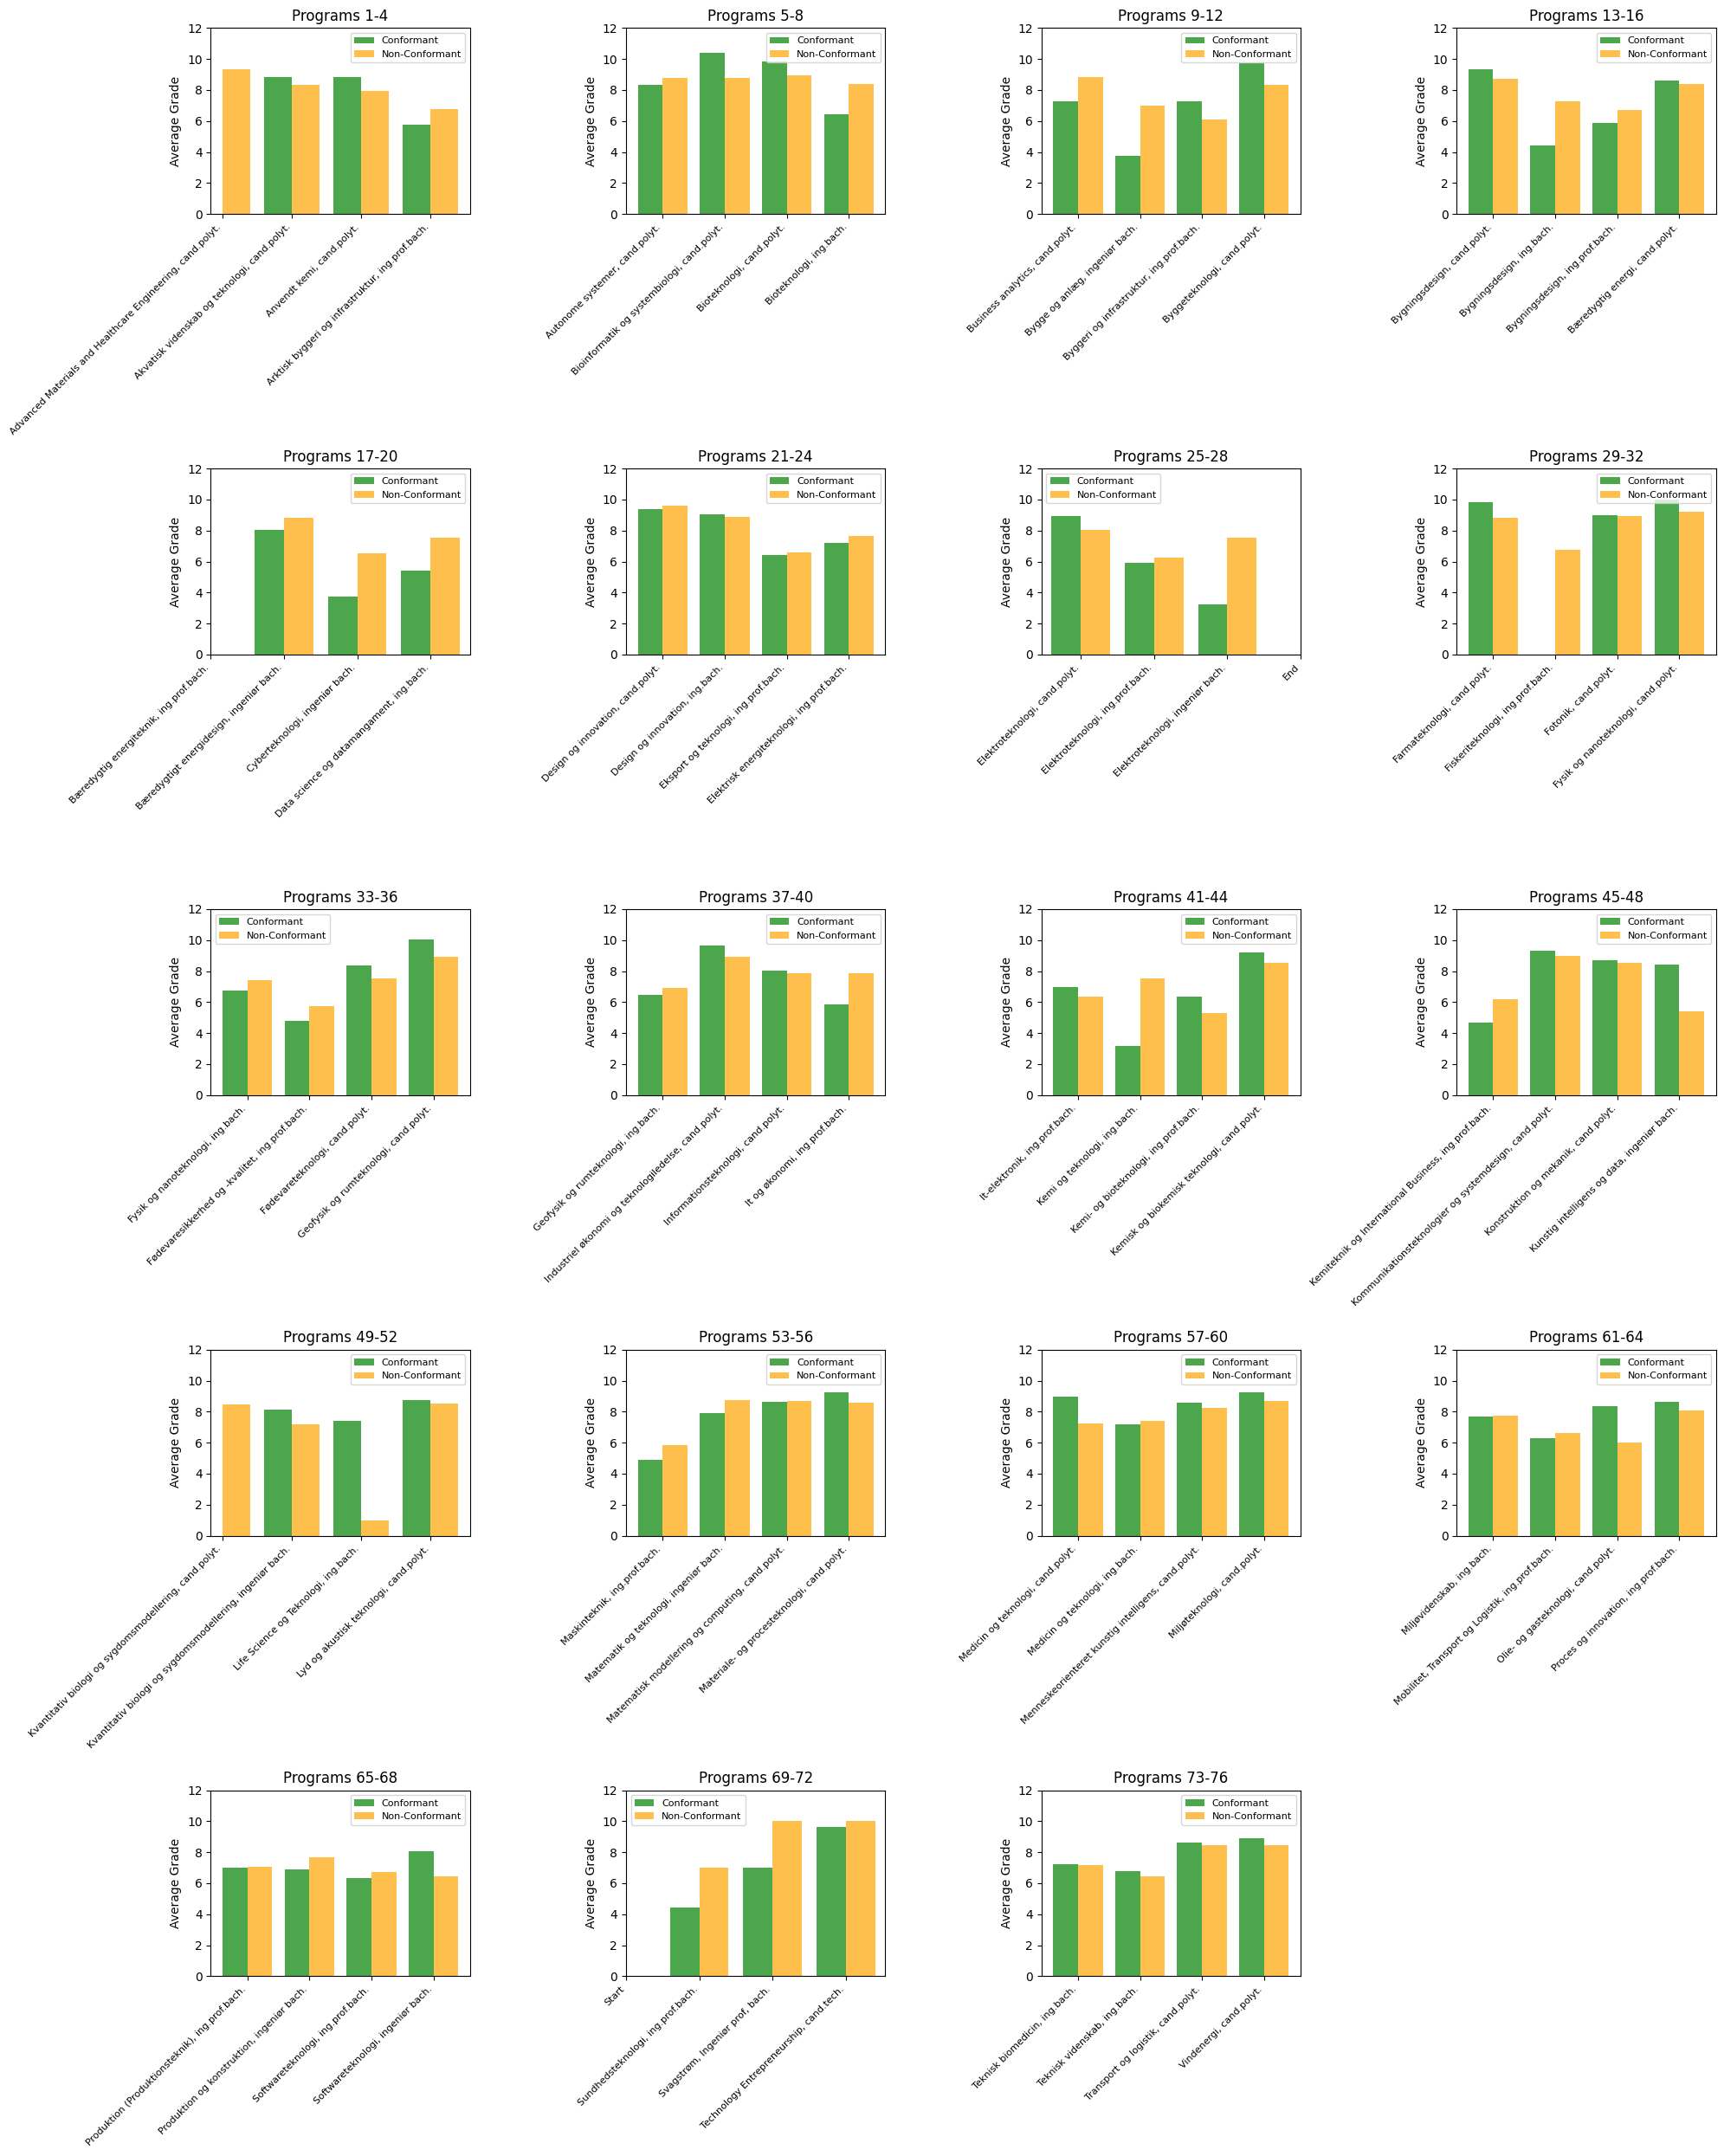

In [53]:
# add the program name to the data
comparison_df['Program'] = comparison_df['Program'].str.extract(r'([A-Za-z]+)')
# Load the data
conformant_data = pd.read_csv(conformant_csv_path)
non_conformant_data = pd.read_csv(non_conformant_csv_path)

# Compute average grades for Conformant and Non-Conformant across all programs
if 'Grade' in conformant_data.columns and 'Grade' in non_conformant_data.columns:
    # Convert 'Grade' to numeric for proper computation
    conformant_data['Grade'] = pd.to_numeric(conformant_data['Grade'], errors='coerce')
    non_conformant_data['Grade'] = pd.to_numeric(non_conformant_data['Grade'], errors='coerce')

    # Calculate average grades for conformant and non-conformant programs
    avg_conformant_grades = conformant_data.groupby('Program')['Grade'].mean().reset_index()
    avg_non_conformant_grades = non_conformant_data.groupby('Program')['Grade'].mean().reset_index()

    # Merge the results for comparison
    avg_grade_comparison = pd.merge(
        avg_conformant_grades,
        avg_non_conformant_grades,
        on='Program',
        how='outer',
        suffixes=('_Conformant', '_Non_Conformant')
    )

    # # Display the average grades comparison
    # print("\nAverage Grades Comparison Across Programs:")
    # print(avg_grade_comparison)

    # Plot the average grades
    plt.figure(figsize=(14, 8))
    bar_width = 0.4
    x = range(len(avg_grade_comparison))

    # Plot Conformant Average Grades
    plt.bar(
        [i - bar_width / 2 for i in x],
        avg_grade_comparison['Grade_Conformant'],
        width=bar_width,
        label='Conformant',
        color='green'
    )

    # Plot Non-Conformant Average Grades
    plt.bar(
        [i + bar_width / 2 for i in x],
        avg_grade_comparison['Grade_Non_Conformant'],
        width=bar_width,
        label='Non-Conformant',
        color='orange'
    )

    # Add labels, title, and legend
    plt.xlabel('Program', fontsize=12)
    plt.ylabel('Average Grade', fontsize=12)
    plt.ylim(0, 12)
    plt.title('Average Grades Comparison Between Conformant and Non-Conformant Programs', fontsize=14)
    plt.xticks(x, avg_grade_comparison['Program'], rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Grade column is missing in the dataset!")
    
# Generate charts with the required layout based on the uploaded example

# Number of programs and layout configuration
num_programs = len(avg_grade_comparison)
programs_per_chart = 4  # Each chart displays 4 programs
charts_per_row = 4  # 4 charts per row
total_charts = -(-num_programs // programs_per_chart)  # Total number of charts (ceiling division)
rows = -(-total_charts // charts_per_row)  # Total rows

# Create subplots
fig, axes = plt.subplots(rows, charts_per_row, figsize=(20, rows * 5))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, ax in enumerate(axes):
    start_idx = i * programs_per_chart
    end_idx = start_idx + programs_per_chart

    if start_idx < num_programs:
        # Extract data for the current set of programs
        sub_data = avg_grade_comparison.iloc[start_idx:end_idx]
        x = range(len(sub_data))
        
        # Plot conformant and non-conformant grades
        ax.bar(
            [j - 0.2 for j in x],
            sub_data['Grade_Conformant'],
            width=0.4,
            label='Conformant',
            color='green',
            alpha=0.7
        )
        ax.bar(
            [j + 0.2 for j in x],
            sub_data['Grade_Non_Conformant'],
            width=0.4,
            label='Non-Conformant',
            color='orange',
            alpha=0.7
        )
        
        # Set title, labels, and ticks
        ax.set_title(f"Programs {start_idx + 1}-{min(end_idx, num_programs)}", fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(sub_data['Program'], rotation=45, ha='right', fontsize=8)
        ax.set_ylabel('Average Grade', fontsize=10)
        ax.set_ylim(0, 12)
        ax.legend(fontsize=8)
    else:
        ax.axis('off')  # Hide axes if no data

# Adjust layout and display the plots
plt.tight_layout()
plt.show()





Count of Higher Categories:
Higher_Category
Non-Conformant    39
Conformant        37
Name: count, dtype: int64


(np.float64(-1.0999994309482872),
 np.float64(1.0999936195977946),
 np.float64(-1.0999994137539704),
 np.float64(1.0999970712036484))

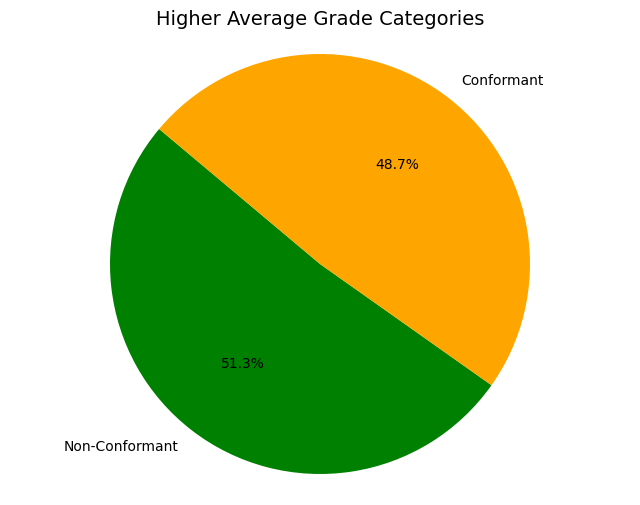

In [54]:
# Calculate which category has more programs with higher average grades
avg_grade_comparison['Higher_Category'] = avg_grade_comparison.apply(
    lambda row: 'Conformant' if row['Grade_Conformant'] > row['Grade_Non_Conformant']
    else ('Equal' if row['Grade_Conformant'] == row['Grade_Non_Conformant'] else 'Non-Conformant'),
    axis=1
)

# Count the number of programs with higher average grades in each category
higher_counts = avg_grade_comparison['Higher_Category'].value_counts()

# Display the result
print("\nCount of Higher Categories:")
print(higher_counts)
# Plot the result
plt.figure(figsize=(8, 6))
plt.pie(higher_counts, labels=higher_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'gray'])
plt.title("Higher Average Grade Categories", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


In [55]:
# Calculate the overall average score for each side (Conformant and Non-Conformant)
conformant_avg_score = avg_grade_comparison['Grade_Conformant'].mean()
non_conformant_avg_score = avg_grade_comparison['Grade_Non_Conformant'].mean()

# Determine which side has the highest overall average score
if conformant_avg_score > non_conformant_avg_score:
    highest_avg_side = "Conformant"
elif conformant_avg_score < non_conformant_avg_score:
    highest_avg_side = "Non-Conformant"
else:
    highest_avg_side = "Equal"

# Display the results
print("Average Score for Conformant:", conformant_avg_score)
print("Average Score for Non-Conformant:", non_conformant_avg_score)
print("Side with the Highest Average Score:", highest_avg_side)


Average Score for Conformant: 7.549686043223995
Average Score for Non-Conformant: 7.676819477112928
Side with the Highest Average Score: Non-Conformant


In [56]:
import pandas as pd

# Load the two datasets
conformant_log_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_log_hierarchical.csv'
non_conformant_log_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_log_hierarchical.csv'

conformant_data = pd.read_csv(conformant_log_path)
non_conformant_data = pd.read_csv(non_conformant_log_path)

# Ensure 'Grade' is numeric for analysis
conformant_data['Grade'] = pd.to_numeric(conformant_data['Grade'], errors='coerce')
non_conformant_data['Grade'] = pd.to_numeric(non_conformant_data['Grade'], errors='coerce')

# Group by 'Program' and calculate the average grade for Conformant side
conformant_performance = conformant_data.groupby('Program')['Grade'].mean().reset_index()
conformant_performance = conformant_performance.sort_values(by='Grade', ascending=False)

# Group by 'Program' and calculate the average grade for Non-Conformant side
non_conformant_performance = non_conformant_data.groupby('Program')['Grade'].mean().reset_index()
non_conformant_performance = non_conformant_performance.sort_values(by='Grade', ascending=False)

# Display the top-performing programs for each side
print("Top-Performing Programs (Conformant):")
print(conformant_performance.head())  # Top 5 Conformant programs

print("\nTop-Performing Programs (Non-Conformant):")
print(non_conformant_performance.head())  # Top 5 Non-Conformant programs

# Save results to files 
conformant_performance.to_csv('conformant_top_performing_programs.csv', index=False)
non_conformant_performance.to_csv('non_conformant_top_performing_programs.csv', index=False)


Top-Performing Programs (Conformant):
                                        Program      Grade
4   Bioinformatik og systembiologi, cand.polyt.  10.404255
33        Geofysik og rumteknologi, cand.polyt.  10.035714
29          Fysik og nanoteknologi, cand.polyt.   9.983740
5                     Bioteknologi, cand.polyt.   9.830601
27                  Farmateknologi, cand.polyt.   9.813725

Top-Performing Programs (Non-Conformant):
                                              Program      Grade
69                    Svagstrøm, Ingeniør prof, bach.  10.000000
70            Technology Entrepreneurship, cand.tech.  10.000000
19                  Design og innovation, cand.polyt.   9.599620
0   Advanced Materials and Healthcare Engineering,...   9.314286
30                Fysik og nanoteknologi, cand.polyt.   9.223131


### We found the previous threshold setting for conformance to be less reasonable, so we decided to adopt the IQR (Interquartile Range) method to split the logs.

#### Using this updated approach, the new datasets have been generated by commercial tool (Disco) as follows:

##### Conformance students dataset:
     /data/conformance_checking/filtered_data/combined_and_or_relations/original_split_dataset/conformance_students_iqr.csv
##### Non-conformance students dataset: 
    /data/conformance_checking/filtered_data/combined_and_or_relations/original_split_dataset/non_conformance_students_iqr.csv

#### With these datasets, we will begin a re-analysis focusing on the grades. Additionally, we believe that relying solely on the average score is insufficient. Therefore, we have incorporated ECTS as a reference point and, based on this, applied the GPA computation for a more comprehensive evaluation.

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:64: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:64: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\2842447676.py:8: SyntaxWarning: invalid escape sequence '\c'
  conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\conformant_students_refined_cleaned.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\2842447676.py:9: SyntaxWarning: invalid escape sequence '\c'
  non_conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\\non_conformant_students_refined_cleaned.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\2842447676.py:64: SyntaxWarning: invalid escape sequence '\c'
  gpa_compa

Average GPA Comparison:
                Average GPA
Conformant         7.925756
Non-Conformant     7.929424

GPA Comparison CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\filtered_data\combined_and_or_relations\original_split_dataset\gpa_comparison_corrected.csv


C:\Users\chens\AppData\Local\Temp\ipykernel_12200\2842447676.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_gpa)


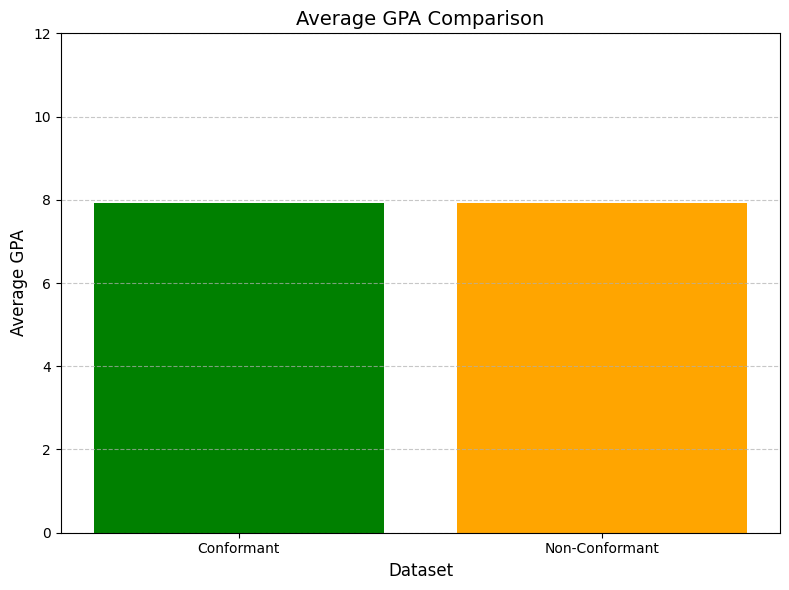

In [ ]:
import pandas as pd

# Load datasets
# conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\conformant_students_iqr.csv'
# non_conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\non_conformant_students_iqr.csv'

# To imporve the effectiveness of the data analysis, we use the data after the data cleaning, which is the refined data. We remove the outliers in the data.
conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\conformant_students_refined_cleaned.csv'
non_conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\\non_conformant_students_refined_cleaned.csv'
conformant_students_df = pd.read_csv(conformant_file_path)
non_conformant_students_df = pd.read_csv(non_conformant_file_path)

# Rename columns for easier handling
conformant_students_df.rename(columns={
    'STUDIENR': 'StudentID',
    'BEDOMMELSE': 'Grade',
    'ECTS': 'ECTS'
}, inplace=True)

non_conformant_students_df.rename(columns={
    'STUDIENR': 'StudentID',
    'BEDOMMELSE': 'Grade',
    'ECTS': 'ECTS'
}, inplace=True)

# Convert 'Grade' and 'ECTS' columns to numeric, coercing errors to NaN
conformant_students_df['Grade'] = pd.to_numeric(conformant_students_df['Grade'], errors='coerce')
conformant_students_df['ECTS'] = pd.to_numeric(conformant_students_df['ECTS'], errors='coerce')

non_conformant_students_df['Grade'] = pd.to_numeric(non_conformant_students_df['Grade'], errors='coerce')
non_conformant_students_df['ECTS'] = pd.to_numeric(non_conformant_students_df['ECTS'], errors='coerce')

# Remove rows with NaN values in 'Grade' or 'ECTS'
conformant_students_df = conformant_students_df.dropna(subset=['Grade', 'ECTS'])
non_conformant_students_df = non_conformant_students_df.dropna(subset=['Grade', 'ECTS'])

# Define a function to calculate GPA
def calculate_gpa(group):
    return (group['ECTS'] * group['Grade']).sum() / group['ECTS'].sum()

# Group by 'StudentID' and calculate GPA for each dataset
conformant_students_gpa = (
    conformant_students_df.groupby('StudentID')
    .apply(calculate_gpa)
    .rename('GPA')
)

non_conformant_students_gpa = (
    non_conformant_students_df.groupby('StudentID')
    .apply(calculate_gpa)
    .rename('GPA')
)

# Compute the average GPA for all students in each dataset
average_gpa_conformant = conformant_students_gpa.mean()
average_gpa_non_conformant = non_conformant_students_gpa.mean()

# Prepare the final results
gpa_comparison = pd.DataFrame({
    'Average GPA': [average_gpa_conformant, average_gpa_non_conformant]
}, index=['Conformant', 'Non-Conformant'])

# Save the GPA comparison to a CSV file
gpa_comparison_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\gpa_comparison_corrected.csv'
gpa_comparison.to_csv(gpa_comparison_path)

# Display the results
print("Average GPA Comparison:")
print(gpa_comparison)
print(f"\nGPA Comparison CSV saved at: {gpa_comparison_path}")

# visualize the data
import matplotlib.pyplot as plt

# Plot the average GPA comparison
plt.figure(figsize=(8, 6))
plt.bar(gpa_comparison.index, gpa_comparison['Average GPA'], color=['green', 'orange'])
plt.title('Average GPA Comparison', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.ylim(0, 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




C:\Users\chens\AppData\Local\Temp\ipykernel_12200\1701495284.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


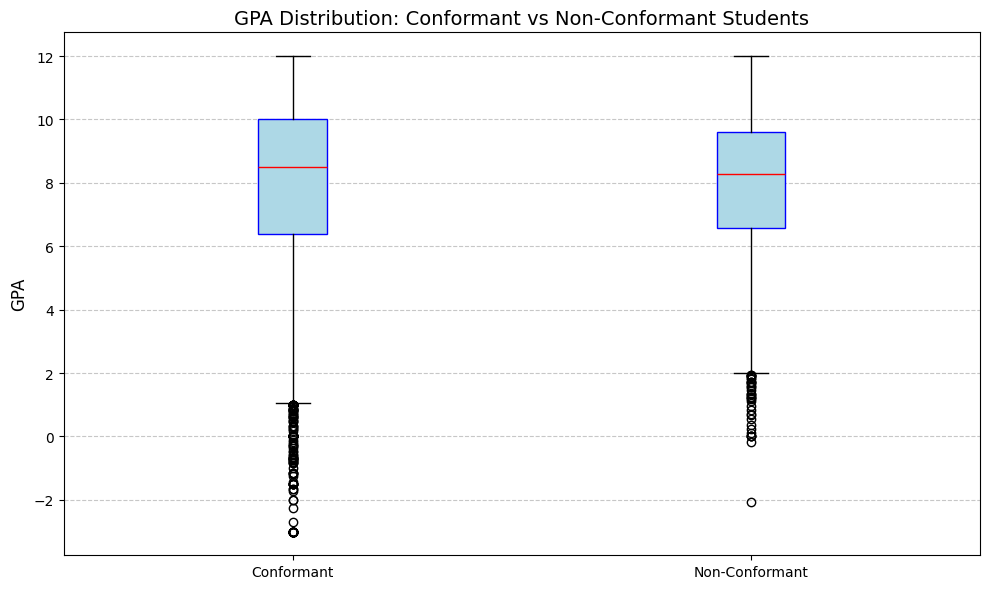

In [58]:
# Create a box plot to show GPA distribution for both datasets
plt.figure(figsize=(10, 6))
plt.boxplot(
    [conformant_students_gpa, non_conformant_students_gpa],
    labels=['Conformant', 'Non-Conformant'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red')
)

plt.title('GPA Distribution: Conformant vs Non-Conformant Students', fontsize=14)
plt.ylabel('GPA', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


To further improve the robustness of the analysis, we introduce the confidence interval calculation for the average GPA of each group. Given the large sample size (n = 10000), the Central Limit Theorem ensures that sampling distribution of the mean approximates a normal distribution, regardless of the underlying data distribution. Thus we use the z-distribution for confidence interval estimation.

95% Confidence Interval [Conformant]: [7.9896, 8.0009]
95% Confidence Interval [Non-Conformant]: [7.9931, 8.0044]

Average GPA Comparison:
Conformant: Average GPA = 7.9953, Confidence Interval = [7.9896, 8.0009]
Non-Conformant: Average GPA = 7.9988, Confidence Interval = [7.9931, 8.0044]


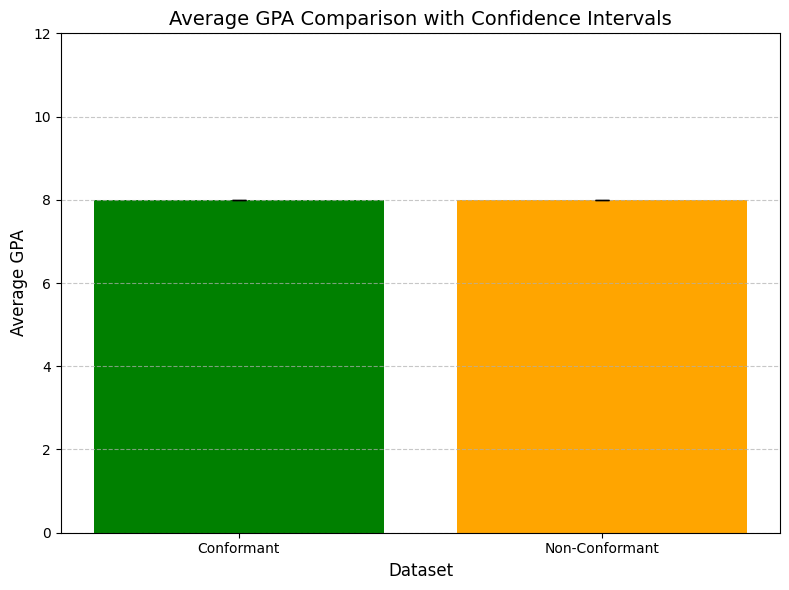

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to calculate confidence intervals using z-distribution
def confidence_interval_large_sample(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use sample standard deviation
    z_critical = norm.ppf((1 + confidence) / 2)  # Z-critical value
    margin_of_error = z_critical * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

# Mock data for conformant and non-conformant groups
# Replace these with the actual data from your previous analysis
conformant_students_gpa = pd.Series(np.random.uniform(7.5, 8.5, 10000))
non_conformant_students_gpa = pd.Series(np.random.uniform(7.5, 8.5, 10000))

# Calculate confidence intervals
ci_conformant = confidence_interval_large_sample(conformant_students_gpa, confidence=0.95)
ci_non_conformant = confidence_interval_large_sample(non_conformant_students_gpa, confidence=0.95)

# Create a DataFrame for GPA comparison
gpa_comparison = pd.DataFrame({
    'Average GPA': [conformant_students_gpa.mean(), non_conformant_students_gpa.mean()],
    'Confidence Interval (Lower)': [ci_conformant[0], ci_non_conformant[0]],
    'Confidence Interval (Upper)': [ci_conformant[1], ci_non_conformant[1]]
}, index=['Conformant', 'Non-Conformant'])

# Print the results with the confidence interval
print(f"95% Confidence Interval [Conformant]: [{ci_conformant[0]:.4f}, {ci_conformant[1]:.4f}]")
print(f"95% Confidence Interval [Non-Conformant]: [{ci_non_conformant[0]:.4f}, {ci_non_conformant[1]:.4f}]")

# Print the average GPA comparison
print("\nAverage GPA Comparison:")
for index, row in gpa_comparison.iterrows():
    print(f"{index}: Average GPA = {row['Average GPA']:.4f}, "
          f"Confidence Interval = [{row['Confidence Interval (Lower)']:.4f}, {row['Confidence Interval (Upper)']:.4f}]")

# Visualization with error bars
plt.figure(figsize=(8, 6))
plt.bar(
    gpa_comparison.index,
    gpa_comparison['Average GPA'],
    yerr=[
        gpa_comparison['Average GPA'] - gpa_comparison['Confidence Interval (Lower)'],
        gpa_comparison['Confidence Interval (Upper)'] - gpa_comparison['Average GPA']
    ],
    capsize=5,
    color=['green', 'orange']
)
plt.title('Average GPA Comparison with Confidence Intervals', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.ylim(0, 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\617897217.py:15: SyntaxWarning: invalid escape sequence '\c'
  program_gpa_comparison_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\program_gpa_comparison.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\617897217.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conformant_program_gpa = conformant_students_df.groupby('UDDANNELSE').apply(
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\617897217.py:6: DeprecationWarning: DataFrameGroupBy.appl

<Figure size 1600x800 with 0 Axes>

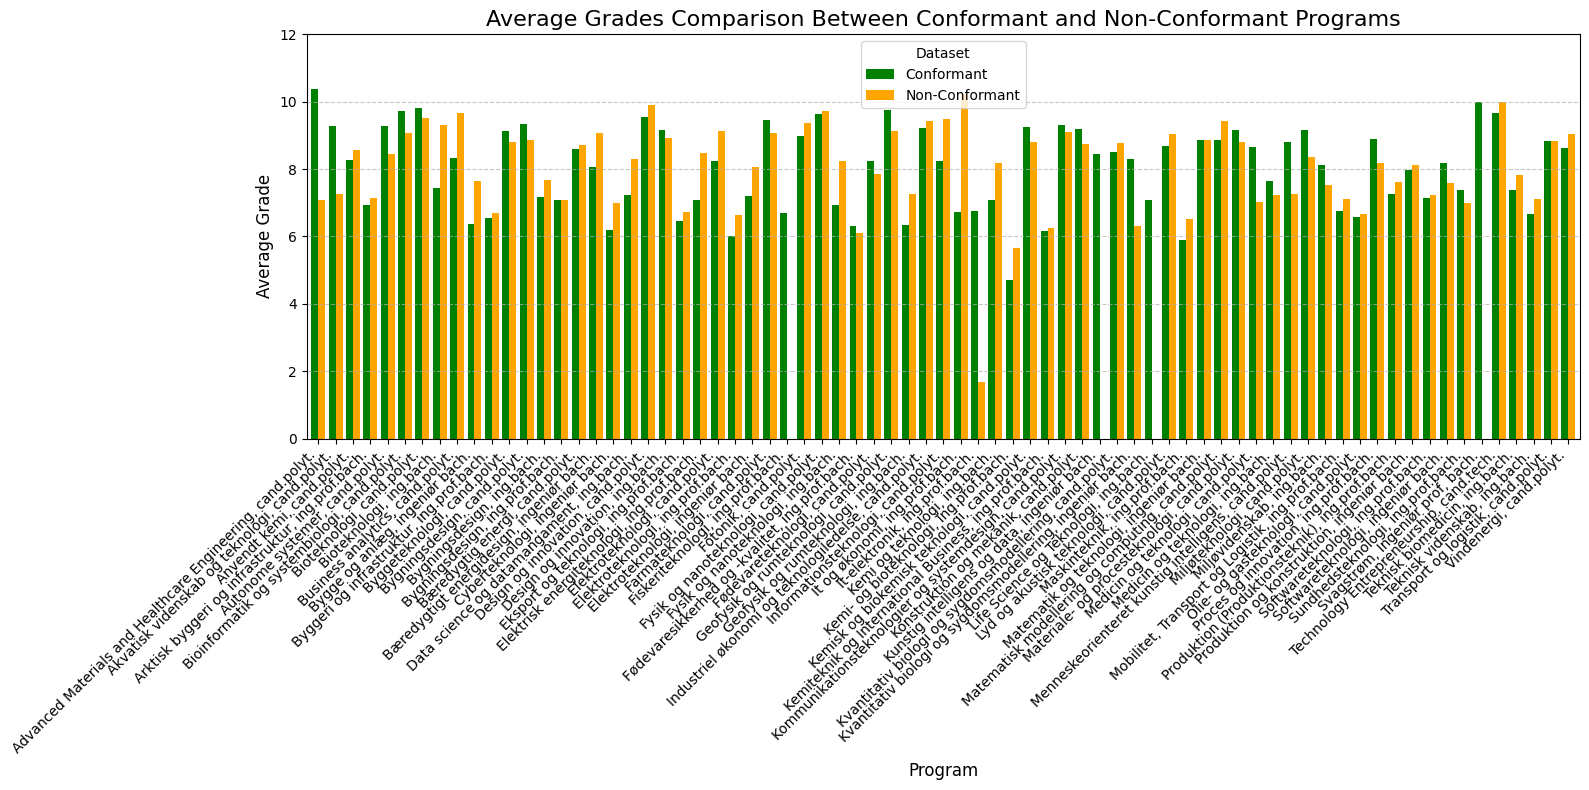

In [60]:
# Calculate the average GPA per program for each dataset
conformant_program_gpa = conformant_students_df.groupby('UDDANNELSE').apply(
    lambda x: (x['ECTS'] * x['Grade']).sum() / x['ECTS'].sum()
).rename('Average GPA')

non_conformant_program_gpa = non_conformant_students_df.groupby('UDDANNELSE').apply(
    lambda x: (x['ECTS'] * x['Grade']).sum() / x['ECTS'].sum()
).rename('Average GPA')

# Combine the two datasets for comparison
program_gpa_comparison = pd.concat([conformant_program_gpa, non_conformant_program_gpa], axis=1)
program_gpa_comparison.columns = ['Conformant', 'Non-Conformant']

# Save and display the program GPA comparison
program_gpa_comparison_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\program_gpa_comparison.csv'
program_gpa_comparison.to_csv(program_gpa_comparison_path)

# Full program GPA comparison with improved visualization
plt.figure(figsize=(16, 8))
program_gpa_comparison.plot(kind='bar', color=['green', 'orange'], width=0.8, figsize=(16, 8))
plt.title('Average Grades Comparison Between Conformant and Non-Conformant Programs', fontsize=16)
plt.xlabel('Program', fontsize=12)
plt.ylabel('Average Grade', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset', fontsize=10)
plt.tight_layout()
plt.show()




<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\1606343409.py:5: SyntaxWarning: invalid escape sequence '\c'
  conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\conformant_students_refined_cleaned.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\1606343409.py:6: SyntaxWarning: invalid escape sequence '\c'
  non_conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\\non_conformant_students_refined_cleaned.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\1606343409.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping colu

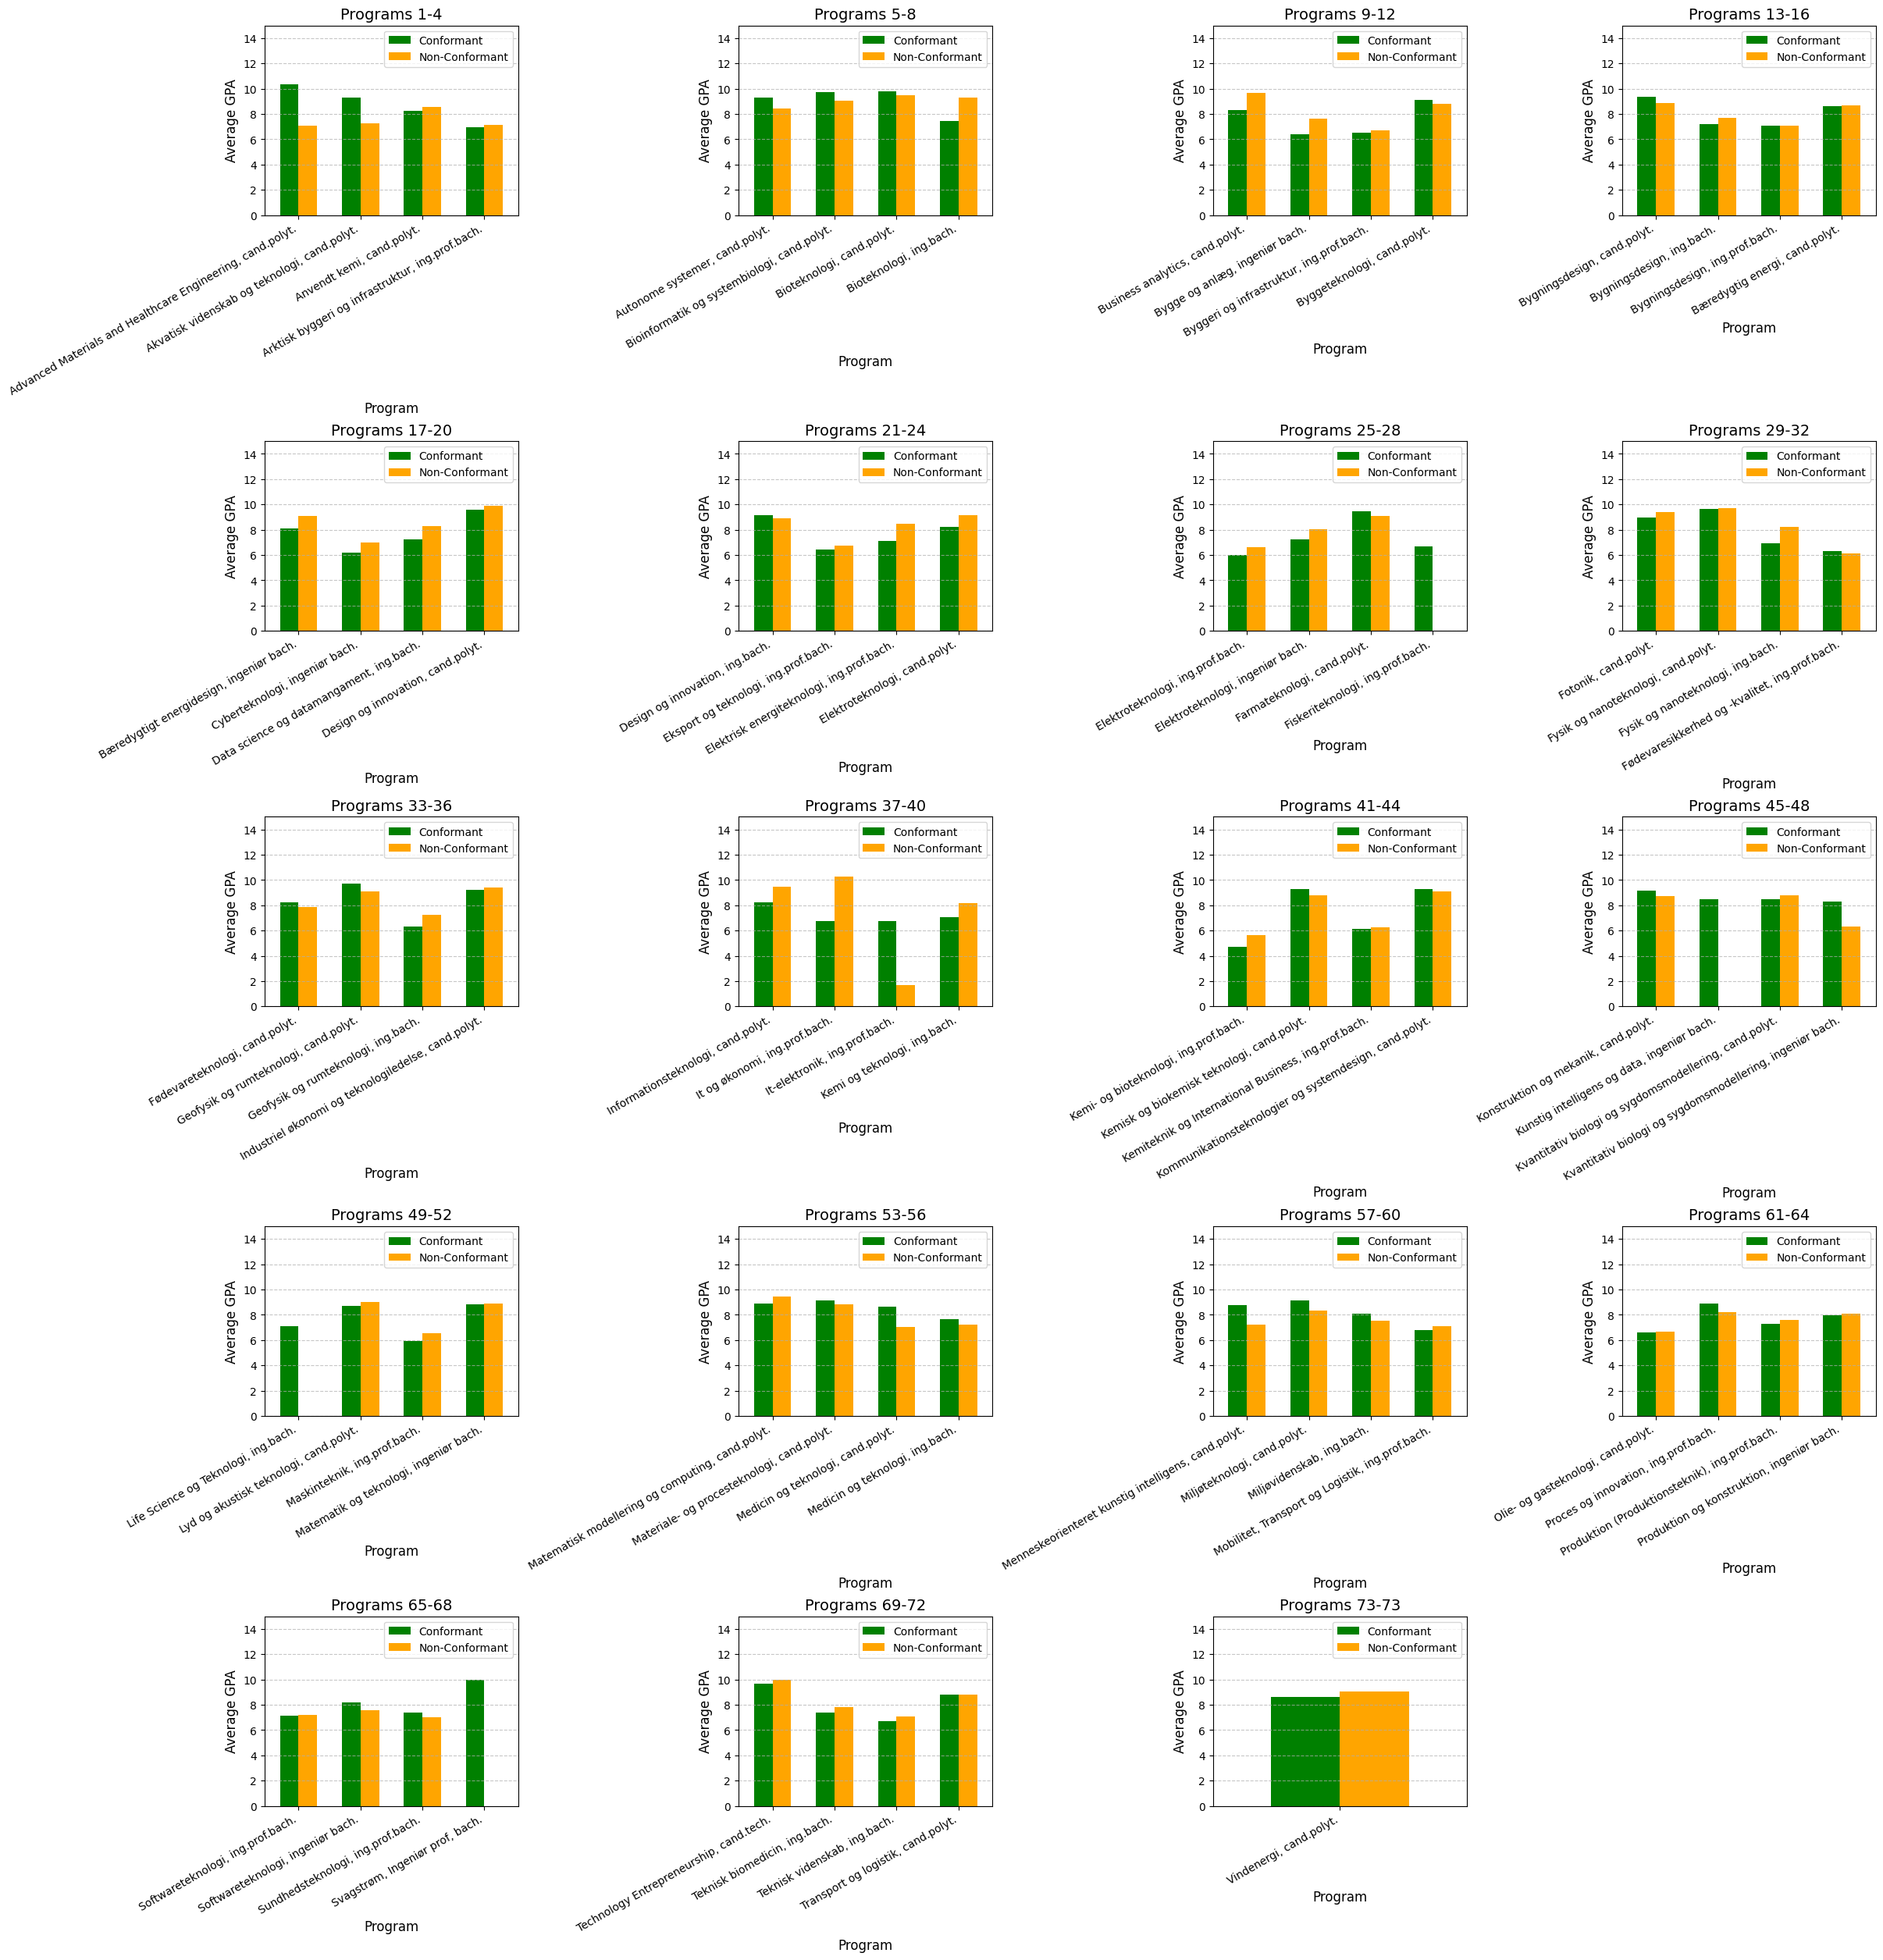

In [61]:

import math

# conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\conformant_students_iqr.csv'
# non_conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\non_conformant_students_iqr.csv'
conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\conformant_students_refined_cleaned.csv'
non_conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\refined_hierarchical\\non_conformant_students_refined_cleaned.csv'

# Reload datasets
conformant_students_df = pd.read_csv(conformant_file_path)
non_conformant_students_df = pd.read_csv(non_conformant_file_path)

# Rename columns for consistency
conformant_students_df.rename(columns={
    'STUDIENR': 'StudentID',
    'BEDOMMELSE': 'Grade',
    'ECTS': 'ECTS'
}, inplace=True)

non_conformant_students_df.rename(columns={
    'STUDIENR': 'StudentID',
    'BEDOMMELSE': 'Grade',
    'ECTS': 'ECTS'
}, inplace=True)

# Convert necessary columns to numeric
conformant_students_df['Grade'] = pd.to_numeric(conformant_students_df['Grade'], errors='coerce')
conformant_students_df['ECTS'] = pd.to_numeric(conformant_students_df['ECTS'], errors='coerce')
non_conformant_students_df['Grade'] = pd.to_numeric(non_conformant_students_df['Grade'], errors='coerce')
non_conformant_students_df['ECTS'] = pd.to_numeric(non_conformant_students_df['ECTS'], errors='coerce')

# Drop rows with missing values
conformant_students_df.dropna(subset=['Grade', 'ECTS'], inplace=True)
non_conformant_students_df.dropna(subset=['Grade', 'ECTS'], inplace=True)

# Recalculate the average GPA for each program
conformant_program_gpa = conformant_students_df.groupby('UDDANNELSE').apply(
    lambda x: (x['ECTS'] * x['Grade']).sum() / x['ECTS'].sum()
).rename('Average GPA')

non_conformant_program_gpa = non_conformant_students_df.groupby('UDDANNELSE').apply(
    lambda x: (x['ECTS'] * x['Grade']).sum() / x['ECTS'].sum()
).rename('Average GPA')

# Combine conformant and non-conformant program GPAs
program_gpa_comparison = pd.concat([conformant_program_gpa, non_conformant_program_gpa], axis=1)
program_gpa_comparison.columns = ['Conformant', 'Non-Conformant']

# Plot multiple subplots in a single figure for program GPA comparison
programs_per_subplot = 4
total_programs = len(program_gpa_comparison)
num_subplots = math.ceil(total_programs / programs_per_subplot)
rows = math.ceil(num_subplots / 4)  # Adjust to show 4 subplots per row

# Adjust layout and improve display format for better readability
fig, axes = plt.subplots(rows, 4, figsize=(24, rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for iteration

for i in range(num_subplots):
    # Select the slice of programs for this subplot
    start_idx = i * programs_per_subplot
    end_idx = min(start_idx + programs_per_subplot, total_programs)
    subset = program_gpa_comparison.iloc[start_idx:end_idx]

    # Plot on the current axis
    subset.plot(kind='bar', color=['green', 'orange'], ax=axes[i], width=0.6)
    axes[i].set_title(f"Programs {start_idx + 1}-{end_idx}", fontsize=14)
    axes[i].set_xlabel('Program', fontsize=12)
    axes[i].set_ylim(0, 15)
    axes[i].set_ylabel('Average GPA', fontsize=12)
    axes[i].set_xticklabels(subset.index, rotation=30, ha='right', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(fontsize=10, loc='upper right')

# Remove unused subplots if grid is larger than needed
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

# Show the updated figure with improved formatting
plt.show()


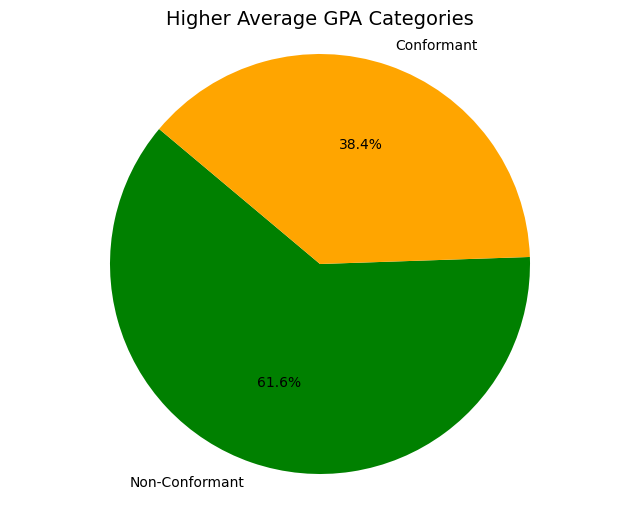

In [62]:
# Compare average GPA for each program between conformant and non-conformant
program_gpa_comparison['Higher GPA'] = program_gpa_comparison.apply(
    lambda row: 'Conformant' if row['Conformant'] > row['Non-Conformant'] else 'Non-Conformant', axis=1
)

# Count the number of programs with higher GPA for each category
higher_gpa_count = program_gpa_comparison['Higher GPA'].value_counts()

# Display the result
higher_gpa_count

# Plot the result
plt.figure(figsize=(8, 6))
plt.pie(higher_gpa_count, labels=higher_gpa_count.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.title("Higher Average GPA Categories", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



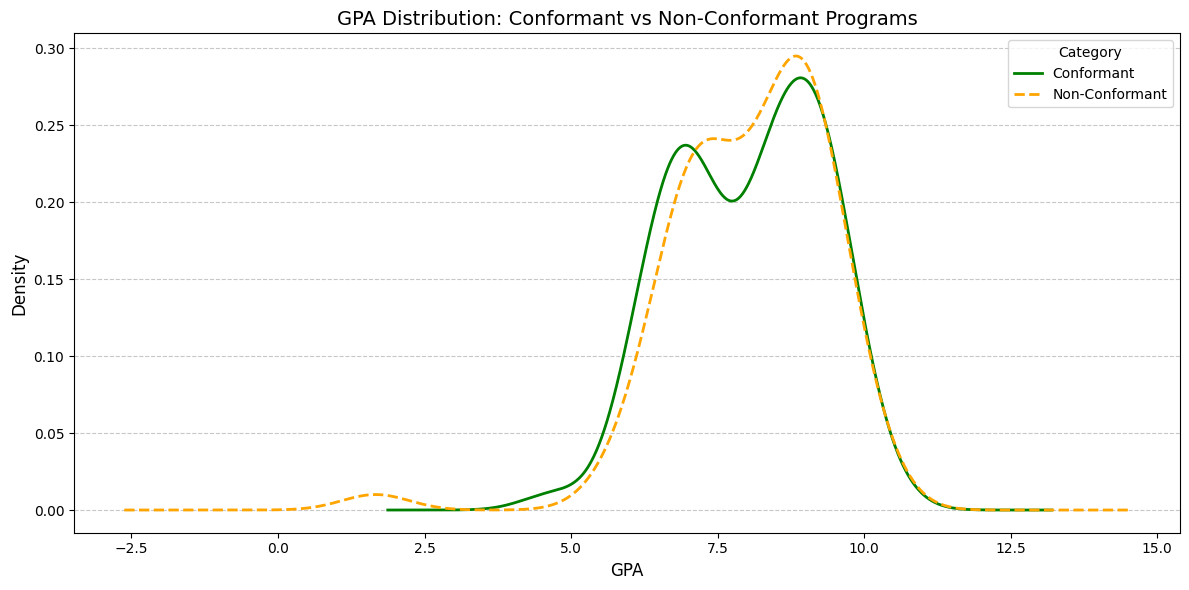

In [63]:
# Visualize the GPA distribution for conformant and non-conformant programs
plt.figure(figsize=(12, 6))

# Plot density for conformant programs
program_gpa_comparison['Conformant'].plot(kind='kde', label='Conformant', linestyle='-', linewidth=2, color='green')

# Plot density for non-conformant programs
program_gpa_comparison['Non-Conformant'].plot(kind='kde', label='Non-Conformant', linestyle='--', linewidth=2, color='orange')

# Add titles and labels
plt.title('GPA Distribution: Conformant vs Non-Conformant Programs', fontsize=14)
plt.xlabel('GPA', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


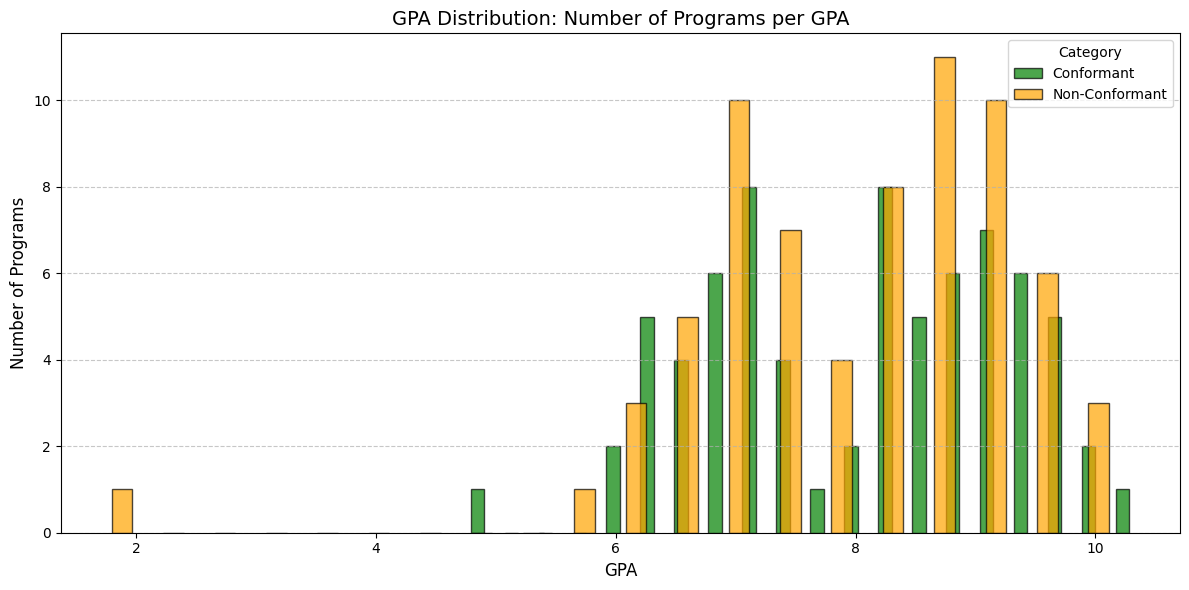

In [64]:
plt.figure(figsize=(12, 6))

bar_width = 0.4  # Width of each bar
bins = 20  # Number of bins for the histogram

# Histogram for conformant programs
conformant_hist = plt.hist(
    program_gpa_comparison['Conformant'].dropna(),
    bins=bins,
    alpha=0.7,
    label='Conformant',
    color='green',
    edgecolor='black',
    rwidth=bar_width,
    align='mid'
)

# Histogram for non-conformant programs with a shift
non_conformant_hist = plt.hist(
    program_gpa_comparison['Non-Conformant'].dropna(),
    bins=bins,
    alpha=0.7,
    label='Non-Conformant',
    color='orange',
    edgecolor='black',
    rwidth=bar_width,
    align='mid'
)

# Add labels, title, and legend
plt.title('GPA Distribution: Number of Programs per GPA', fontsize=14)
plt.xlabel('GPA', fontsize=12)
plt.ylabel('Number of Programs', fontsize=12)
plt.legend(fontsize=10, title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


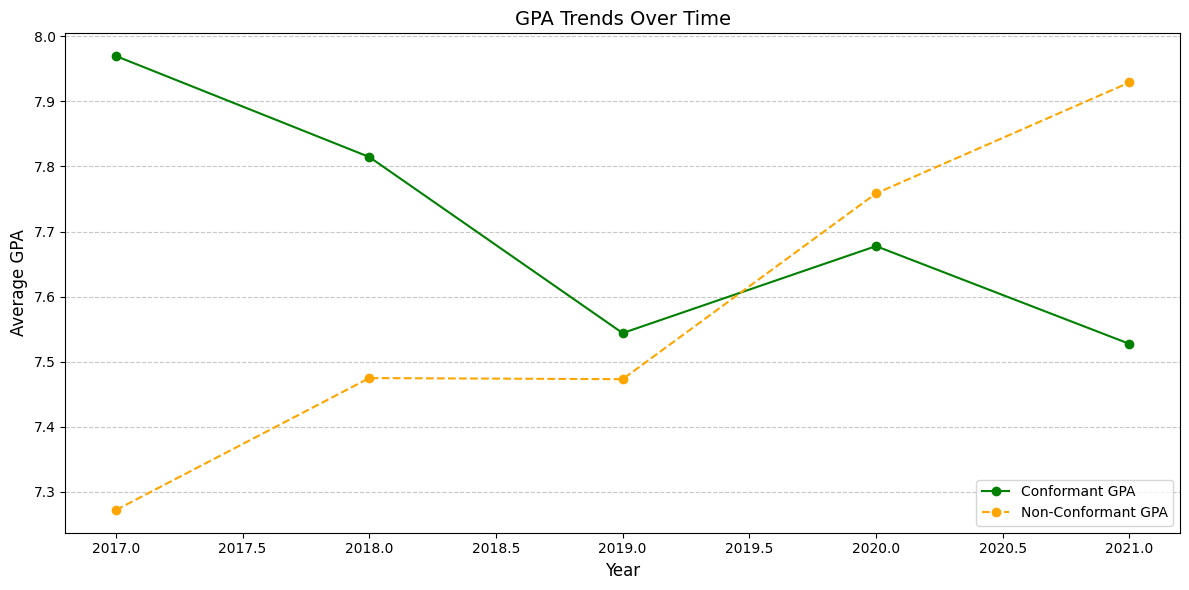

In [65]:
# Ensure the grading date is properly formatted
conformant_students_df['GradingDate'] = pd.to_datetime(conformant_students_df['BEDOMMELSESDATO'], errors='coerce')
non_conformant_students_df['GradingDate'] = pd.to_datetime(non_conformant_students_df['BEDOMMELSESDATO'], errors='coerce')

# Extract the year from the grading date
conformant_students_df['Year'] = conformant_students_df['GradingDate'].dt.year
non_conformant_students_df['Year'] = non_conformant_students_df['GradingDate'].dt.year

# Aggregate GPA by year for both datasets
conformant_gpa_trend = conformant_students_df.groupby('Year')['Grade'].mean().reset_index(name='Conformant GPA')
non_conformant_gpa_trend = non_conformant_students_df.groupby('Year')['Grade'].mean().reset_index(name='Non-Conformant GPA')

# Merge the trends for comparison
gpa_trend_comparison = pd.merge(
    conformant_gpa_trend,
    non_conformant_gpa_trend,
    on='Year',
    how='outer'
).sort_values(by='Year')

# Plot the GPA trends over time
plt.figure(figsize=(12, 6))
plt.plot(gpa_trend_comparison['Year'], gpa_trend_comparison['Conformant GPA'], label='Conformant GPA', marker='o', linestyle='-', color='green')
plt.plot(gpa_trend_comparison['Year'], gpa_trend_comparison['Non-Conformant GPA'], label='Non-Conformant GPA', marker='o', linestyle='--', color='orange')

# Add labels, title, and legend
plt.title('GPA Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<>:52: SyntaxWarning: invalid escape sequence '\c'
<>:52: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chens\AppData\Local\Temp\ipykernel_12200\3987489998.py:52: SyntaxWarning: invalid escape sequence '\c'
  gpa_semester_trend_comparison_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\gpa_semester_trend_comparison.csv'


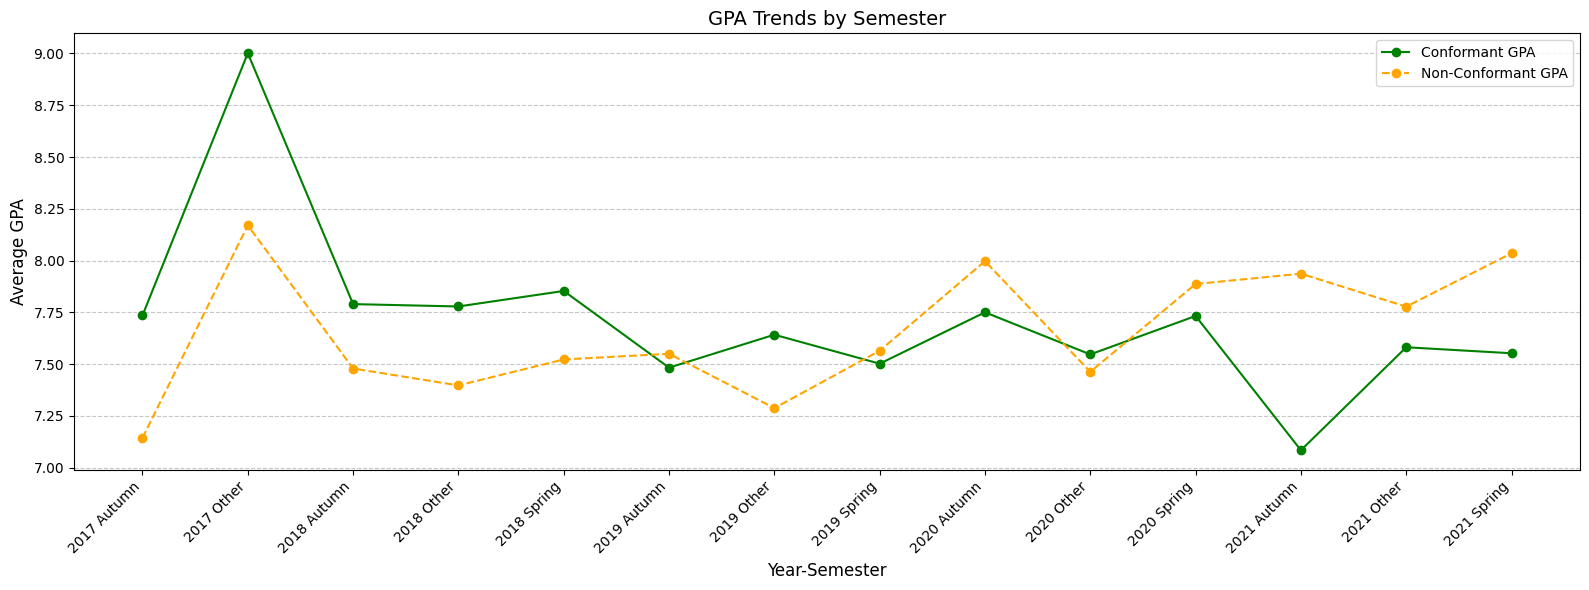

Semester Trend Comparison:
   Year-Semester  Conformant GPA  Non-Conformant GPA
0    2017 Autumn        7.734844            7.143426
1     2017 Other        9.001346            8.170139
2    2018 Autumn        7.789809            7.478731
3     2018 Other        7.778362            7.397264
4    2018 Spring        7.853318            7.522639
5    2019 Autumn        7.482952            7.549953
6     2019 Other        7.642058            7.287610
7    2019 Spring        7.502042            7.564547
8    2020 Autumn        7.750148            7.997018
9     2020 Other        7.546887            7.462675
10   2020 Spring        7.732489            7.886825
11   2021 Autumn        7.084211            7.936688
12    2021 Other        7.581411            7.777482
13   2021 Spring        7.552491            8.035422

Semester Trend Comparison CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\filtered_data\combined_and_or_relations\original_split_dataset\gpa_semes

In [66]:
# Define semesters based on the grading dates
def determine_semester(date):
    if pd.isnull(date):
        return None
    if date.month in [8, 9, 10, 11, 12]:
        return 'Autumn'
    elif date.month in [2, 3, 4, 5, 6]:
        return 'Spring'
    else:
        return 'Other'

# Add semester information to the datasets
conformant_students_df['Semester'] = conformant_students_df['GradingDate'].apply(determine_semester)
non_conformant_students_df['Semester'] = non_conformant_students_df['GradingDate'].apply(determine_semester)

# Combine year and semester for grouping
conformant_students_df['Year-Semester'] = conformant_students_df['Year'].astype(str) + ' ' + conformant_students_df['Semester']
non_conformant_students_df['Year-Semester'] = non_conformant_students_df['Year'].astype(str) + ' ' + non_conformant_students_df['Semester']

# Aggregate GPA by year-semester for both datasets
conformant_gpa_semester_trend = conformant_students_df.groupby('Year-Semester')['Grade'].mean().reset_index(name='Conformant GPA')
non_conformant_gpa_semester_trend = non_conformant_students_df.groupby('Year-Semester')['Grade'].mean().reset_index(name='Non-Conformant GPA')

# Merge the trends for comparison
gpa_semester_trend_comparison = pd.merge(
    conformant_gpa_semester_trend,
    non_conformant_gpa_semester_trend,
    on='Year-Semester',
    how='outer'
).sort_values(by='Year-Semester')

# Plot the GPA trends by semester
plt.figure(figsize=(16, 6))
plt.plot(gpa_semester_trend_comparison['Year-Semester'], gpa_semester_trend_comparison['Conformant GPA'], label='Conformant GPA', marker='o', linestyle='-', color='green')
plt.plot(gpa_semester_trend_comparison['Year-Semester'], gpa_semester_trend_comparison['Non-Conformant GPA'], label='Non-Conformant GPA', marker='o', linestyle='--', color='orange')

# Add labels, title, and legend
plt.title('GPA Trends by Semester', fontsize=14)
plt.xlabel('Year-Semester', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the semester trend data
print("Semester Trend Comparison:")
print(gpa_semester_trend_comparison)

# save the result to a csv file
gpa_semester_trend_comparison_path = 'D:\\Github\\02269-Process-mining-project\\data\conformance_checking\\filtered_data\\combined_and_or_relations\\original_split_dataset\\gpa_semester_trend_comparison.csv'
gpa_semester_trend_comparison.to_csv(gpa_semester_trend_comparison_path)
print(f"\nSemester Trend Comparison CSV saved at: {gpa_semester_trend_comparison_path}")



<Figure size 800x600 with 0 Axes>

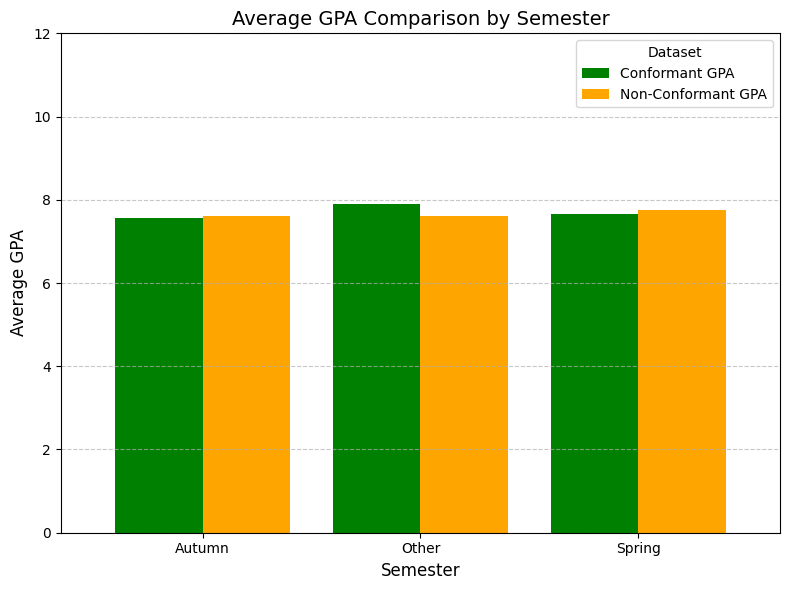

In [67]:
# Calculate average GPA for Spring and Autumn semesters for both categories
semester_performance = gpa_semester_trend_comparison.copy()

# Extract 'Semester' from 'Year-Semester'
semester_performance['Semester'] = semester_performance['Year-Semester'].apply(lambda x: 'Spring' if 'Spring' in x else 'Autumn' if 'Autumn' in x else 'Other')

# Calculate average GPA for each semester type
average_gpa_by_semester = semester_performance.groupby('Semester')[['Conformant GPA', 'Non-Conformant GPA']].mean()

# visualize the data
import matplotlib.pyplot as plt

# Plot the average GPA comparison by semester
plt.figure(figsize=(8, 6))
average_gpa_by_semester.plot(kind='bar', color=['green', 'orange'], width=0.8, figsize=(8, 6))

# Add labels, title, and legend
plt.title('Average GPA Comparison by Semester', fontsize=14)
plt.xlabel('Semester', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset', fontsize=10)
plt.tight_layout()
plt.show()




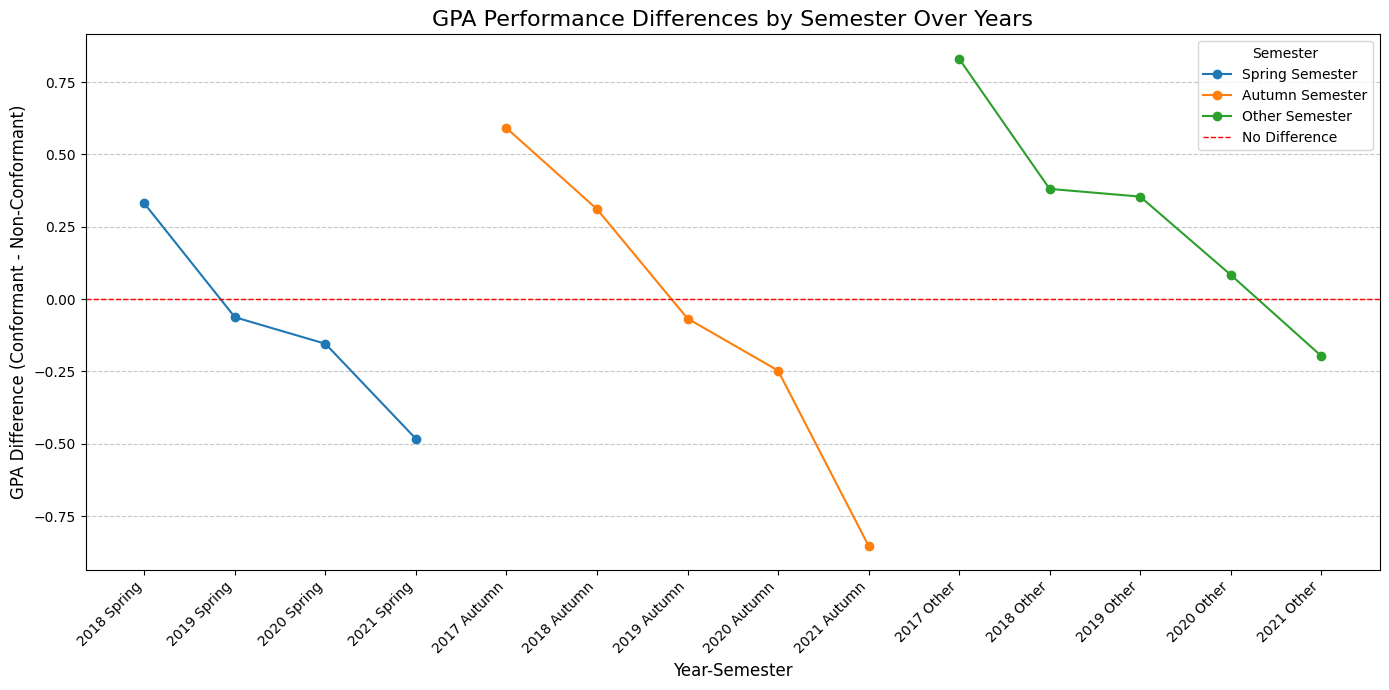

In [68]:
# Create a dataset to compare performance differences by semester over years
semester_performance['GPA Difference'] = semester_performance['Conformant GPA'] - semester_performance['Non-Conformant GPA']

# Plot the performance differences by semester over years
plt.figure(figsize=(14, 7))

# Separate data by semester
for semester in ['Spring', 'Autumn', 'Other']:
    subset = semester_performance[semester_performance['Semester'] == semester]
    plt.plot(
        subset['Year-Semester'],
        subset['GPA Difference'],
        marker='o',
        label=f'{semester} Semester'
    )

# Add labels, title, and legend
plt.title('GPA Performance Differences by Semester Over Years', fontsize=16)
plt.xlabel('Year-Semester', fontsize=12)
plt.ylabel('GPA Difference (Conformant - Non-Conformant)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='No Difference')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(fontsize=10, title='Semester')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

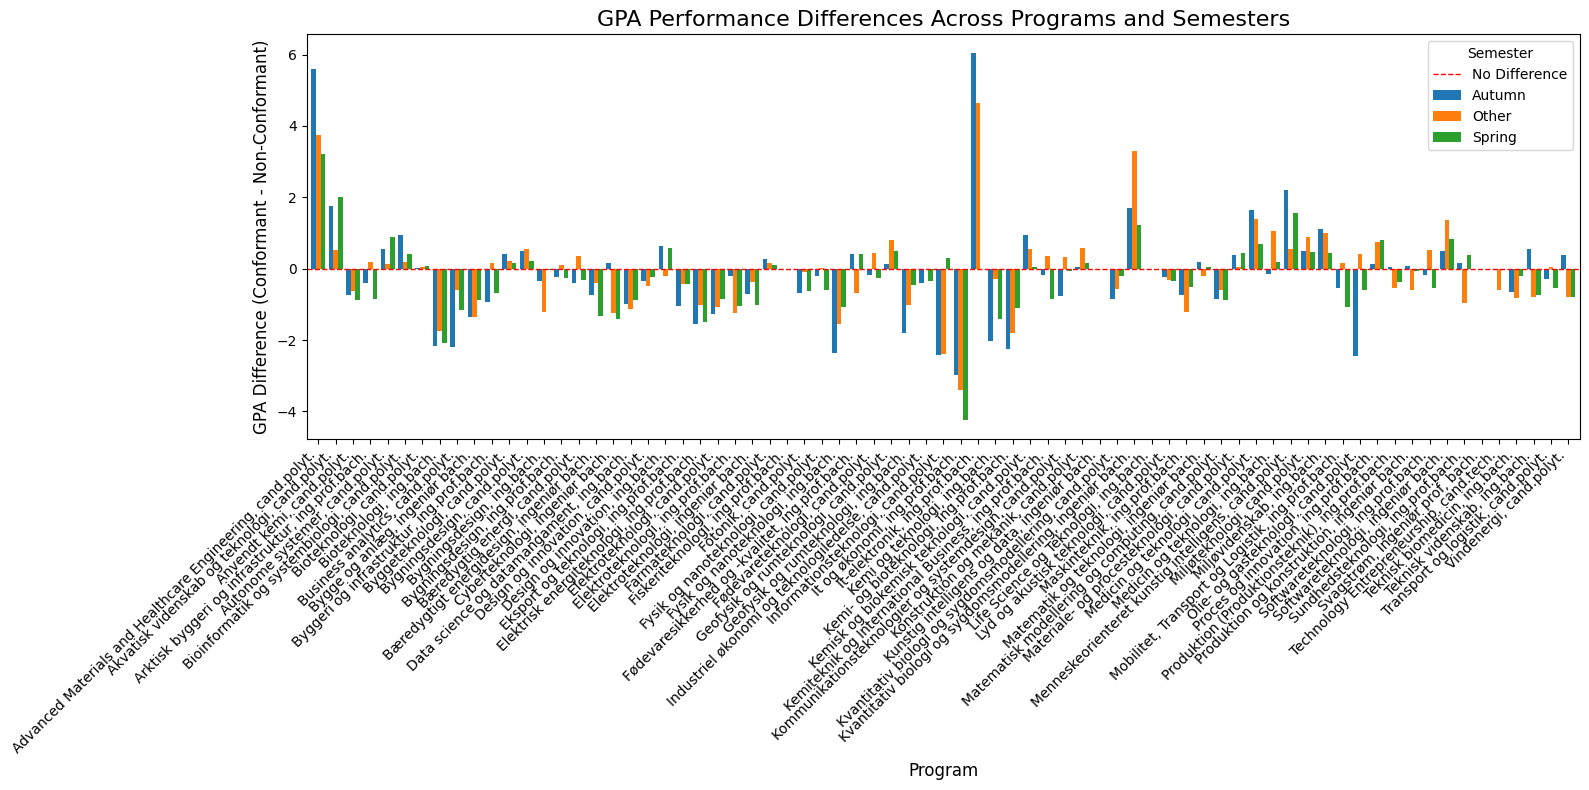

In [69]:
# Aggregate average GPA by program and semester for both conformant and non-conformant categories
program_semester_performance = (
    conformant_students_df.groupby(['UDDANNELSE', 'Semester'])['Grade'].mean()
    .reset_index(name='Conformant GPA')
    .merge(
        non_conformant_students_df.groupby(['UDDANNELSE', 'Semester'])['Grade'].mean()
        .reset_index(name='Non-Conformant GPA'),
        on=['UDDANNELSE', 'Semester'],
        how='outer'
    )
)

# Calculate GPA differences for visualization
program_semester_performance['GPA Difference'] = (
    program_semester_performance['Conformant GPA'] - program_semester_performance['Non-Conformant GPA']
)

# Plot GPA differences across programs and semesters
plt.figure(figsize=(14, 8))
program_semester_performance.pivot(index='UDDANNELSE', columns='Semester', values='GPA Difference').plot(
    kind='bar', figsize=(16, 8), width=0.8
)

# Add labels, title, and legend
plt.title('GPA Performance Differences Across Programs and Semesters', fontsize=16)
plt.xlabel('Program', fontsize=12)
plt.ylabel('GPA Difference (Conformant - Non-Conformant)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='No Difference')
plt.legend(title='Semester', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
